https://towardsdatascience.com/stochastic-simulation-helps-you-grasp-concepts-of-statistics-befdba517404

In [9]:
import matplotlib.pyplot as plt
import stats
from scipy import stats

In [7]:
dice = np.array([1,2,3,4,5,6])
def dice_throw(dice):
    """Simulates a single dice throw"""
    return np.random.choice(dice)

In [12]:
print("Here are 10 throws....")
for i in range(10):
    print(dice_throw(dice), end=',')

Here are 10 throws....
6,5,6,5,4,5,1,2,4,4,

In [43]:
av = []
n_throws = []
for i in[5,10, 15, 25, 50,75,100,150,200,250,500,750,1000]:
    throws = []
    for j in range(i):
        throws.append(dice_throw(dice))
    mean = np.array(throws).mean()
    av.append(mean)
    n_throws.append(i)


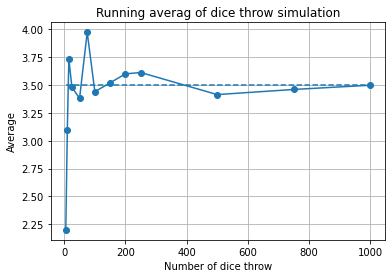

In [51]:
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Number of dice throw', ylabel='Average', title='Running averag of dice throw simulation')
plt.plot(n_throws, av, marker = 'o')
plt.hlines(3.5,n_throws[0],n_throws[len(n_throws)-1], linestyle='--')


In [52]:
num_weeks=52
production=np.random.normal(loc=20,scale=5,size=num_weeks)

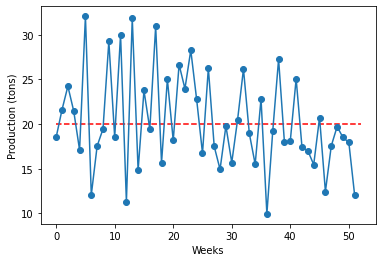

In [60]:
plt.plot(production, marker = 'o')
plt.hlines(20,0,num_weeks, linestyle='--',color='red')
plt.xlabel('Weeks')
plt.ylabel('Production (tons)')
plt.title='Typical factory production over a year'

In [10]:
def repeat(n):
    """
    Simulates the factory run `n` number of times
    Counts the frequency where population mean (i.e. 20) is contained in the C.I.
    """
    interval_90_count = 0
    interval_99_count = 0
    num_weeks = 52
    
    for i in range(n):
        production = np.random.normal(loc=20,scale=5,size=num_weeks)
        m = production.mean()
        std_err=production.std()/np.sqrt(num_weeks)
        # for 90% CI
        confidence = .9
        h = std_err * stats.t.ppf((1 + confidence) / 2, num_weeks)
        if m-h <= 20 <= m+h:
            interval_90_count+=1
        # for 99% CI
        confidence = .99
        h = std_err * stats.t.ppf((1 + confidence) / 2, num_weeks)
        if m-h <= 20 <= m+h:
            interval_99_count+=1
    return (interval_90_count,interval_99_count)

    

In [11]:
repetitions = 10000
int_90,int_99 = repeat(repetitions)

In [14]:
int_90,int_99

(8891, 9902)

In [15]:
round(int_90/repetitions,3)

0.889

In [16]:
round(int_99/repetitions,3)

0.99